In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load & Clean Data

##Police Shootings

In [2]:
#load shooting data
drive_dir = '/content/drive/MyDrive/Colab Notebooks/Project 1'
shootings_df = pd.read_csv(drive_dir + '/fatal-police-shootings-data.csv')

In [3]:
shootings_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


###Clean

In [4]:
shootings_df['date'] = pd.to_datetime(shootings_df['date'])

In [5]:
#look at variable values
for col in shootings_df.columns:
  if shootings_df[col].nunique() <= 52: 
    print(col)
    print(shootings_df[col].unique())
    print('------------------------------------------------')


manner_of_death
['shot' 'shot and Tasered']
------------------------------------------------
gender
['M' 'F' nan]
------------------------------------------------
race
['A' 'W' 'H' 'B' 'O' nan 'N']
------------------------------------------------
state
['WA' 'OR' 'KS' 'CA' 'CO' 'OK' 'AZ' 'IA' 'PA' 'TX' 'OH' 'LA' 'MT' 'UT'
 'AR' 'IL' 'NV' 'NM' 'MN' 'MO' 'VA' 'NJ' 'IN' 'KY' 'MA' 'NH' 'FL' 'ID'
 'MD' 'NE' 'MI' 'GA' 'TN' 'NC' 'AK' 'NY' 'ME' 'AL' 'MS' 'WI' 'SC' 'DE'
 'DC' 'WV' 'HI' 'WY' 'ND' 'CT' 'SD' 'VT' 'RI']
------------------------------------------------
signs_of_mental_illness
[ True False]
------------------------------------------------
threat_level
['attack' 'other' 'undetermined']
------------------------------------------------
flee
['Not fleeing' 'Car' 'Foot' 'Other' nan]
------------------------------------------------
body_camera
[False  True]
------------------------------------------------
is_geocoding_exact
[ True False]
------------------------------------------------


In [6]:
#data cleaning
#look at missing values
for col in shootings_df.columns:
  missing = shootings_df[col].isna().sum()
  num_col = shootings_df.shape[0]
  miss_per = 100*(missing/num_col)
  print(f'{col}:{miss_per:.2f}%')

# race, flee, lat & long most missing values
#variables I'm interested in have 0% missing

id:0.00%
name:5.67%
date:0.00%
manner_of_death:0.00%
armed:2.64%
age:6.29%
gender:0.39%
race:18.96%
city:0.00%
state:0.00%
signs_of_mental_illness:0.00%
threat_level:0.00%
flee:12.07%
body_camera:0.00%
longitude:10.50%
latitude:10.50%
is_geocoding_exact:0.00%


In [7]:
#add year column
shootings_df['year']= shootings_df['date'].dt.year
shootings_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015


In [8]:
shootings_df['month']= shootings_df['date'].dt.month
shootings_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,1


In [9]:
shootings_df.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
longitude                         float64
latitude                          float64
is_geocoding_exact                   bool
year                                int64
month                               int64
dtype: object

In [10]:
shootings_df['year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

##Income

In [11]:
#load income data
income_df = pd.read_csv(drive_dir + '/MedianHouseholdIncome2015.csv', encoding = 'unicode_escape')
income_df.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


###Clean

In [12]:
#rename columns to match bodycam_df & shootings_df
income_df.rename(columns = {'City':'city', 
                            'Geographic Area': 'state', 
                            'Median Income' : 'median income'}, 
                 inplace = True)
income_df.columns

Index(['state', 'city', 'median income'], dtype='object')

In [13]:
#edit city names
income_df.columns = income_df.columns.str.lower()
income_df['city'] = income_df['city'].str.replace(' (balance)', '')
income_df['city'] = income_df['city'].str.replace(' city', '')
income_df['city'] = income_df['city'].str.replace(' CDP', '')
income_df['city'] = income_df['city'].str.replace(' borough', '')
income_df['city'] = income_df['city'].str.replace(' town', '')
income_df.head()

<ipython-input-13-043f4a3a00fa>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  income_df['city'] = income_df['city'].str.replace(' (balance)', '')


,state,city,median income
0,AL,Abanda,11207
1,AL,Abbeville,25615
2,AL,Adamsville,42575
3,AL,Addison,37083
4,AL,Akron,21667


In [14]:
for col in income_df.columns:
  missing = income_df[col].isna().sum()
  num_col = income_df.shape[0]
  miss_per = 100*(missing/num_col)
  print(f'{col}:{miss_per:.2f}%')
#all looks good, doesn't really need a clean

state:0.00%
city:0.00%
median income:0.17%


In [15]:
income_df.dropna()

,state,city,median income
0,AL,Abanda,11207
1,AL,Abbeville,25615
2,AL,Adamsville,42575
3,AL,Addison,37083
4,AL,Akron,21667
...,...,...,...
29314,WY,Wheatland,34984
29316,WY,Wilson,94792
29318,WY,Worland,41523
29319,WY,Wright,77114


In [16]:
income_df.dtypes

state            object
city             object
median income    object
dtype: object

In [17]:
income_df['median income'] = pd.to_numeric(income_df['median income'], errors="coerce")

##Population

In [18]:
#load population data
population_df = pd.read_csv(drive_dir + '/sub-est2019_all.csv', encoding = "ISO-8859-1")
population_df.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,...,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,40,1,0,0,0,0,0,A,Alabama,Alabama,...,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,...,2699,2694,2643,2628,2608,2600,2584,2575,2571,2560
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,...,4500,4493,4471,4449,4420,4390,4356,4327,4308,4281
3,162,1,0,484,0,0,0,A,Addison town,Alabama,...,751,750,743,742,739,734,731,726,723,718
4,162,1,0,676,0,0,0,A,Akron town,Alabama,...,355,347,347,343,338,339,333,332,331,328


###Clean

In [19]:
us_state_to_abbrev = {"Alabama": "AL","Alaska": "AK","Arizona": "AZ","Arkansas": "AR","California": "CA","Colorado": "CO","Connecticut": "CT","Delaware": "DE",
                      "Florida": "FL","Georgia": "GA","Hawaii": "HI","Idaho": "ID","Illinois": "IL","Indiana": "IN","Iowa": "IA","Kansas": "KS","Kentucky": "KY",
                      "Louisiana": "LA","Maine": "ME","Maryland": "MD","Massachusetts": "MA","Michigan": "MI","Minnesota": "MN","Mississippi": "MS","Missouri": "MO",
                      "Montana": "MT","Nebraska": "NE","Nevada": "NV","New Hampshire": "NH","New Jersey": "NJ","New Mexico": "NM","New York": "NY","North Carolina": "NC",
                      "North Dakota": "ND","Ohio": "OH","Oklahoma": "OK","Oregon": "OR","Pennsylvania": "PA","Rhode Island": "RI","South Carolina": "SC",
                      "South Dakota": "SD","Tennessee": "TN","Texas": "TX","Utah": "UT","Vermont": "VT","Virginia": "VA","Washington": "WA","West Virginia": "WV",
                      "Wisconsin": "WI","Wyoming": "WY","District of Columbia": "DC","American Samoa": "AS","Guam": "GU","Northern Mariana Islands": "MP","Puerto Rico": "PR",
                      "United States Minor Outlying Islands": "UM","U.S. Virgin Islands": "VI",}

population_df["state"] = population_df['STNAME'].map(us_state_to_abbrev)

In [20]:
population_df = population_df.rename(columns={'NAME':'city'})

In [21]:
population_df['city'] = population_df['city'].str.replace(' city','')
population_df['city'] = population_df['city'].str.replace(' town','')
population_df['city'] = population_df['city'].str.replace(' CDP','')
population_df['city'] = population_df['city'].str.replace(' borough','')

In [22]:
for col in population_df.columns:
  missing = population_df[col].isna().sum()
  num_col = population_df.shape[0]
  miss_per = 100*(missing/num_col)
  print(f'{col}:{miss_per:.2f}%')
  #beautiful - no missing values

SUMLEV:0.00%
STATE:0.00%
COUNTY:0.00%
PLACE:0.00%
COUSUB:0.00%
CONCIT:0.00%
PRIMGEO_FLAG:0.00%
FUNCSTAT:0.00%
city:0.00%
STNAME:0.00%
CENSUS2010POP:0.00%
ESTIMATESBASE2010:0.00%
POPESTIMATE2010:0.00%
POPESTIMATE2011:0.00%
POPESTIMATE2012:0.00%
POPESTIMATE2013:0.00%
POPESTIMATE2014:0.00%
POPESTIMATE2015:0.00%
POPESTIMATE2016:0.00%
POPESTIMATE2017:0.00%
POPESTIMATE2018:0.00%
POPESTIMATE2019:0.00%
state:0.00%


In [23]:
population_df.dtypes

SUMLEV                int64
STATE                 int64
COUNTY                int64
PLACE                 int64
COUSUB                int64
CONCIT                int64
PRIMGEO_FLAG          int64
FUNCSTAT             object
city                 object
STNAME               object
CENSUS2010POP        object
ESTIMATESBASE2010     int64
POPESTIMATE2010       int64
POPESTIMATE2011       int64
POPESTIMATE2012       int64
POPESTIMATE2013       int64
POPESTIMATE2014       int64
POPESTIMATE2015       int64
POPESTIMATE2016       int64
POPESTIMATE2017       int64
POPESTIMATE2018       int64
POPESTIMATE2019       int64
state                object
dtype: object

##Mental Illness by State

In [24]:
#load the data
illness_df = pd.read_csv(drive_dir + '/mental_health_data.csv')
illness_df.head()

,fips,state,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,name,id,percentageAdults
0,51,Virginia,223.36045,8820504,8757467,8631393,8568357,8001024,0.00720,63037,0.10242,Richmond,5167000,0.0553
1,48,Texas,116.16298,30345487,29945493,29145505,28745507,25145561,0.01336,399994,0.20679,Austin,4805000,0.0528
2,2,Alaska,1.29738,740339,738023,733391,731075,710231,0.00314,2316,0.04239,Juneau,236400,0.0520
3,47,Tennessee,171.70515,7080262,7023788,6910840,6854371,6346105,0.00804,56474,0.11569,Nashville,4752006,0.0517
4,41,Oregon,45.41307,4359110,4318492,4237256,4196636,3831074,0.00941,40618,0.13783,Salem,4164900,0.0498


In [25]:
illness_df.shape

(50, 14)

###Clean

In [26]:
for col in illness_df.columns:
  missing = illness_df[col].isna().sum()
  num_col = illness_df.shape[0]
  miss_per = 100*(missing/num_col)
  print(f'{col}:{miss_per:.2f}%')
  #missing 4% of values in 'percentage adults'

fips:0.00%
state:0.00%
densityMi:0.00%
pop2023:0.00%
pop2022:0.00%
pop2020:0.00%
pop2019:0.00%
pop2010:0.00%
growthRate:0.00%
growth:0.00%
growthSince2010:0.00%
name:0.00%
id:0.00%
percentageAdults:4.00%


In [27]:
us_state_to_abbrev = {"Alabama": "AL","Alaska": "AK","Arizona": "AZ","Arkansas": "AR","California": "CA","Colorado": "CO","Connecticut": "CT","Delaware": "DE",
                      "Florida": "FL","Georgia": "GA","Hawaii": "HI","Idaho": "ID","Illinois": "IL","Indiana": "IN","Iowa": "IA","Kansas": "KS","Kentucky": "KY",
                      "Louisiana": "LA","Maine": "ME","Maryland": "MD","Massachusetts": "MA","Michigan": "MI","Minnesota": "MN","Mississippi": "MS","Missouri": "MO",
                      "Montana": "MT","Nebraska": "NE","Nevada": "NV","New Hampshire": "NH","New Jersey": "NJ","New Mexico": "NM","New York": "NY","North Carolina": "NC",
                      "North Dakota": "ND","Ohio": "OH","Oklahoma": "OK","Oregon": "OR","Pennsylvania": "PA","Rhode Island": "RI","South Carolina": "SC",
                      "South Dakota": "SD","Tennessee": "TN","Texas": "TX","Utah": "UT","Vermont": "VT","Virginia": "VA","Washington": "WA","West Virginia": "WV",
                      "Wisconsin": "WI","Wyoming": "WY","District of Columbia": "DC","American Samoa": "AS","Guam": "GU","Northern Mariana Islands": "MP","Puerto Rico": "PR",
                      "United States Minor Outlying Islands": "UM","U.S. Virgin Islands": "VI",}

illness_df['state'] = illness_df['state'].map(us_state_to_abbrev).values
illness_df.head()

,fips,state,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,name,id,percentageAdults
0,51,VA,223.36045,8820504,8757467,8631393,8568357,8001024,0.00720,63037,0.10242,Richmond,5167000,0.0553
1,48,TX,116.16298,30345487,29945493,29145505,28745507,25145561,0.01336,399994,0.20679,Austin,4805000,0.0528
2,2,AK,1.29738,740339,738023,733391,731075,710231,0.00314,2316,0.04239,Juneau,236400,0.0520
3,47,TN,171.70515,7080262,7023788,6910840,6854371,6346105,0.00804,56474,0.11569,Nashville,4752006,0.0517
4,41,OR,45.41307,4359110,4318492,4237256,4196636,3831074,0.00941,40618,0.13783,Salem,4164900,0.0498


In [28]:
small_illness_df = illness_df[['state','name','percentageAdults']]
small_illness_df = small_illness_df.rename(columns={'name':'city'})
small_illness_df.head()

,state,city,percentageAdults
0,VA,Richmond,0.0553
1,TX,Austin,0.0528
2,AK,Juneau,0.0520
3,TN,Nashville,0.0517
4,OR,Salem,0.0498


#Data Organization & New DFs

##Pull 2015 Data

In [29]:
#2015 pop data
pop2015_df = population_df[['city','state','POPESTIMATE2015']]
pop2015_df.head()

,city,state,POPESTIMATE2015
0,Alabama,AL,4852347
1,Abbeville,AL,2600
2,Adamsville,AL,4390
3,Addison,AL,734
4,Akron,AL,339


In [30]:
pop2015_df.rename(columns = {'POPESTIMATE2015':'2015 population'}, inplace = True)
pop2015_df.columns

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Index(['city', 'state', '2015 population'], dtype='object')

In [31]:
#make dataframe with only 2015 data
df_2015 = shootings_df[shootings_df['year'] == 2015]
df_2015['year'].unique()

array([2015])

##Merge Datasets

In [32]:
#merge body cam and income
j1_df = pd.merge(df_2015, income_df, how = 'left', on=['state','city'])
print(j1_df.shape)
j1_df.head()

(999, 20)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,median income
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,1,37072.0
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,1,65765.0
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,1,45947.0
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,1,81294.0
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,1,47791.0


In [33]:
j2_df = pd.merge(j1_df, small_illness_df, how = 'left', on=['state','city'])
j2_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,median income,percentageAdults
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,attack,Not fleeing,False,-123.122,47.247,True,2015,1,37072.0,NaN
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,...,attack,Not fleeing,False,-122.892,45.487,True,2015,1,65765.0,NaN
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,other,Not fleeing,False,-97.281,37.695,True,2015,1,45947.0,NaN
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,...,attack,Not fleeing,False,-122.422,37.763,True,2015,1,81294.0,NaN
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,...,attack,Not fleeing,False,-104.692,40.384,True,2015,1,47791.0,NaN


In [34]:
#add population data 
full_df = pd.merge(j2_df, pop2015_df, on=['state','city'])
print(full_df.shape)
full_df.head()

(1749, 22)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,median income,percentageAdults,2015 population
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,Not fleeing,False,-123.122,47.247,True,2015,1,37072.0,NaN,9789
1,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,Not fleeing,False,-123.122,47.247,True,2015,1,37072.0,NaN,9789
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,Not fleeing,False,-97.281,37.695,True,2015,1,45947.0,NaN,389412
3,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,Not fleeing,False,-97.281,37.695,True,2015,1,45947.0,NaN,389412
4,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,Not fleeing,False,-97.281,37.695,True,2015,1,45947.0,NaN,389412


In [35]:
full_df.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
longitude                         float64
latitude                          float64
is_geocoding_exact                   bool
year                                int64
month                               int64
median income                     float64
percentageAdults                  float64
2015 population                     int64
dtype: object

##Subsetting Data

In [36]:
#make new df w relevant variables
small_df = full_df[['date',
                    'year',
                    'id',
                    'signs_of_mental_illness',
                    'body_camera',
                    'city',
                    'state',
                    'median income',
                    '2015 population',
                    'percentageAdults']]
small_df.head()

,date,year,id,signs_of_mental_illness,body_camera,city,state,median income,2015 population,percentageAdults
0,2015-01-02,2015,3,True,False,Shelton,WA,37072.0,9789,NaN
1,2015-01-02,2015,3,True,False,Shelton,WA,37072.0,9789,NaN
2,2015-01-03,2015,5,False,False,Wichita,KS,45947.0,389412,NaN
3,2015-01-03,2015,5,False,False,Wichita,KS,45947.0,389412,NaN
4,2015-01-03,2015,5,False,False,Wichita,KS,45947.0,389412,NaN


In [37]:
#look at missing values in small df
for col in small_df.columns:
  missing = small_df[col].isna().sum()
  num_col = small_df.shape[0]
  miss_per = 100*(missing/num_col)
  print(f'{col}:{miss_per:.2f}%')
  #looks great!

date:0.00%
year:0.00%
id:0.00%
signs_of_mental_illness:0.00%
body_camera:0.00%
city:0.00%
state:0.00%
median income:3.43%
2015 population:0.00%
percentageAdults:92.57%


##Group by State

In [38]:
state_df = small_df.groupby('state').agg({"id": "count",
                                         "median income": np.mean,
                                         '2015 population': np.mean, 
                                         'signs_of_mental_illness': np.sum, 
                                         'body_camera': np.sum})
state_df.reset_index(inplace=True)

In [39]:
for col in small_df.columns:
  missing = small_df[col].isna().sum()
  num_col = small_df.shape[0]
  miss_per = 100*(missing/num_col)
  print(f'{col}:{miss_per:.2f}%')

date:0.00%
year:0.00%
id:0.00%
signs_of_mental_illness:0.00%
body_camera:0.00%
city:0.00%
state:0.00%
median income:3.43%
2015 population:0.00%
percentageAdults:92.57%


In [40]:
state_df['per_mental_illness'] = (state_df['signs_of_mental_illness']/state_df['id']) * 100
state_df['fatalities_1MM'] = (state_df['id']/state_df['2015 population']) * 1000000
state_df['freq_cam'] = (state_df['body_camera']/state_df['id']) * 100

In [41]:
state_df.head()

,state,id,median income,2015 population,signs_of_mental_illness,body_camera,per_mental_illness,fatalities_1MM,freq_cam
0,AK,4,55229.000000,31638.000000,0,0,0.000000,126.430242,0.000000
1,AL,27,41416.880000,36499.000000,11,4,40.740741,739.746294,14.814815
2,AR,10,36220.000000,21268.800000,2,0,20.000000,470.172271,0.000000
3,AZ,74,48613.315068,498147.364865,18,4,24.324324,148.550419,5.405405
4,CA,328,57609.607362,621555.533537,83,34,25.304878,527.708278,10.365854


###Merge mental illness & clean new df

In [42]:
state_illness = pd.merge(state_df, small_illness_df, how = 'left', on='state')
state_illness.head()

,state,id,median income,2015 population,signs_of_mental_illness,body_camera,per_mental_illness,fatalities_1MM,freq_cam,city,percentageAdults
0,AK,4,55229.000000,31638.000000,0,0,0.000000,126.430242,0.000000,Juneau,0.0520
1,AL,27,41416.880000,36499.000000,11,4,40.740741,739.746294,14.814815,Montgomery,0.0425
2,AR,10,36220.000000,21268.800000,2,0,20.000000,470.172271,0.000000,Little Rock,0.0390
3,AZ,74,48613.315068,498147.364865,18,4,24.324324,148.550419,5.405405,Phoenix,0.0379
4,CA,328,57609.607362,621555.533537,83,34,25.304878,527.708278,10.365854,Sacramento,0.0343


In [43]:
for col in state_illness.columns:
  missing = state_illness[col].isna().sum()
  num_col = state_illness.shape[0]
  miss_per = 100*(missing/num_col)
  print(f'{col}:{miss_per:.2f}%')
  #this is a workable amount of missing %

state:0.00%
id:0.00%
median income:4.17%
2015 population:0.00%
signs_of_mental_illness:0.00%
body_camera:0.00%
per_mental_illness:0.00%
fatalities_1MM:0.00%
freq_cam:0.00%
city:2.08%
percentageAdults:6.25%


In [44]:
state_illness = state_illness.dropna()
for col in state_illness.columns:
  missing = state_illness[col].isna().sum()
  num_col = state_illness.shape[0]
  miss_per = 100*(missing/num_col)
  print(f'{col}:{miss_per:.2f}%')

state:0.00%
id:0.00%
median income:0.00%
2015 population:0.00%
signs_of_mental_illness:0.00%
body_camera:0.00%
per_mental_illness:0.00%
fatalities_1MM:0.00%
freq_cam:0.00%
city:0.00%
percentageAdults:0.00%


In [45]:
state_illness = state_illness.rename(columns={'percentageAdults':'percent_illness_state'})
state_illness.columns

Index(['state', 'id', 'median income', '2015 population',
       'signs_of_mental_illness', 'body_camera', 'per_mental_illness',
       'fatalities_1MM', 'freq_cam', 'city', 'percent_illness_state'],
      dtype='object')

##Group by City

In [46]:
city_df = small_df.groupby('city').agg({"id": "count",
                                         "median income": np.mean,
                                         '2015 population': np.mean, 
                                         'signs_of_mental_illness': np.sum, 
                                         'body_camera': np.sum})
city_df.reset_index(inplace=True)

In [47]:
city_df['per_mental_illness'] = (city_df['signs_of_mental_illness']/city_df['id']) * 100
city_df['fatalities_1MM'] = (city_df['id']/city_df['2015 population']) * 100000
city_df['freq_cam'] = (city_df['body_camera']/city_df['id']) * 100

city_df.head()

,city,id,median income,2015 population,signs_of_mental_illness,body_camera,per_mental_illness,fatalities_1MM,freq_cam
0,Aiken,2,55502.0,30325.0,0,0,0.0,6.595218,0.0
1,Akron,8,34512.0,198588.0,4,0,50.0,4.028441,0.0
2,Albuquerque,10,47030.0,557937.0,0,6,0.0,1.792317,60.0
3,Alexandria,2,34579.0,47761.0,0,0,0.0,4.187517,0.0
4,Allentown,4,36930.0,120071.0,0,0,0.0,3.331362,0.0


#Plotting 

##Graph Aesthetics

In [48]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

# Set font sizes individually. For example, you may want the title
# to be very big, but the axes labels to be only medium size.
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

##Change over time: dfs & plotting


In [49]:
shootings_by_year = shootings_df.groupby('year').agg({"id": "count",
                                                      'signs_of_mental_illness': np.sum, 
                                                      'body_camera': np.sum})
shootings_by_year = shootings_by_year.reset_index()
shootings_by_year['percent_all_shootings'] = (shootings_by_year['id']/shootings_df.shape[0])*100
shootings_by_year.rename(columns = {'id':'number of shootings per year'}, inplace = True)
# avg_shootings = 

shootings_by_year.head()

,year,number of shootings per year,signs_of_mental_illness,body_camera,percent_all_shootings
0,2015,994,260,75,12.421895
1,2016,958,248,145,11.972007
2,2017,981,238,109,12.259435
3,2018,992,221,122,12.396901
4,2019,999,216,136,12.484379


In [50]:
#find mean shootings per year
mean_shootings = np.mean(shootings_by_year['number of shootings per year'])
mean_shootings

1000.25

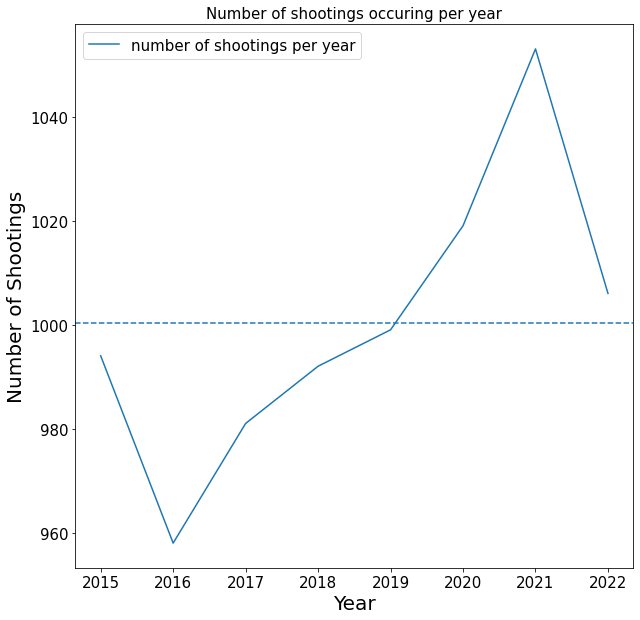

In [51]:
by_year_plot = shootings_by_year.plot(kind = 'line',
                       x = 'year', 
                       y = 'number of shootings per year',
                       title = 'Number of shootings occuring per year',
                       xlabel = 'Year',
                       ylabel = 'Number of Shootings',
                       legend = True,
                       figsize = (10,10))
by_year_plot.axhline(y=mean_shootings, linestyle = '--')

##Shootings per 1MM per city

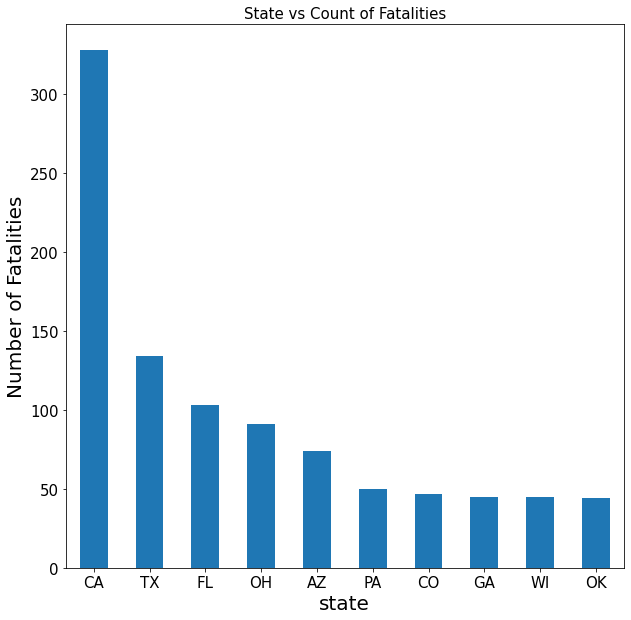

In [52]:
top_state = state_df.sort_values("id", ascending=False)[:10]
top_state.plot(kind = 'bar',
              x = 'state',
              y = 'id',
              figsize=(10,10),
              xlabel = 'state',
              ylabel = 'Number of Fatalities',
              title = 'State vs Count of Fatalities',
              legend = False,
             rot = 0)

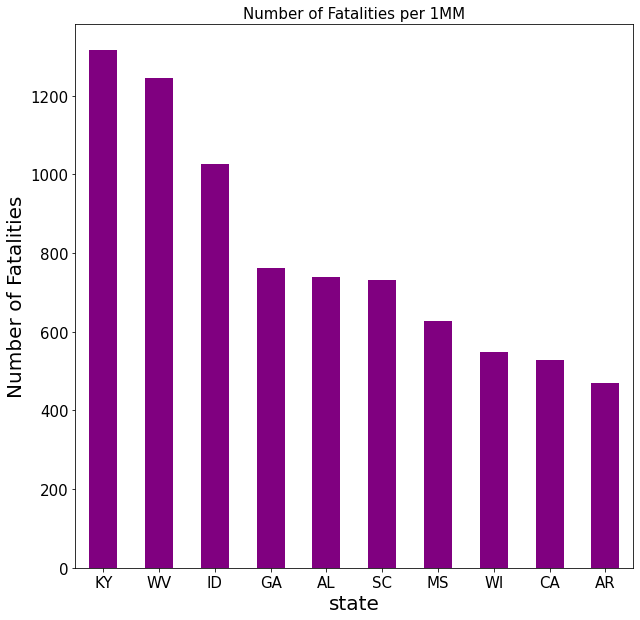

In [53]:
top_state_1mm = state_df.sort_values("fatalities_1MM", ascending=False)[:10]
top_state_1mm.plot(kind = 'bar',
              x = 'state',
              y = 'fatalities_1MM',
              figsize=(10,10),
              xlabel = 'state',
              ylabel = 'Number of Fatalities',
              title = 'Number of Fatalities per 1MM',
             color = 'purple',
              legend = False,
             rot = 0)

In [54]:
top_state_1mm

,state,id,median income,2015 population,signs_of_mental_illness,body_camera,per_mental_illness,fatalities_1MM,freq_cam
16,KY,20,36117.400000,15200.200000,2,2,10.000000,1315.772161,10.000000
46,WV,16,35648.933333,12861.937500,2,0,12.500000,1243.980543,0.000000
12,ID,11,32593.200000,10711.363636,0,6,0.000000,1026.946743,54.545455
10,GA,45,42584.095238,59111.222222,8,6,17.777778,761.276765,13.333333
1,AL,27,41416.880000,36499.000000,11,4,40.740741,739.746294,14.814815
37,SC,24,42904.250000,32830.666667,2,0,8.333333,731.023839,0.000000
24,MS,12,34349.333333,19147.000000,0,2,0.000000,626.730036,16.666667
45,WI,45,49029.288889,82015.755556,20,0,44.444444,548.675065,0.000000
4,CA,328,57609.607362,621555.533537,83,34,25.304878,527.708278,10.365854
2,AR,10,36220.000000,21268.800000,2,0,20.000000,470.172271,0.000000


##Exploring Mental Illness

In [55]:
state_illness = state_illness.dropna()

In [56]:
state_illness.head()

,state,id,median income,2015 population,signs_of_mental_illness,body_camera,per_mental_illness,fatalities_1MM,freq_cam,city,percent_illness_state
0,AK,4,55229.000000,31638.000000,0,0,0.000000,126.430242,0.000000,Juneau,0.0520
1,AL,27,41416.880000,36499.000000,11,4,40.740741,739.746294,14.814815,Montgomery,0.0425
2,AR,10,36220.000000,21268.800000,2,0,20.000000,470.172271,0.000000,Little Rock,0.0390
3,AZ,74,48613.315068,498147.364865,18,4,24.324324,148.550419,5.405405,Phoenix,0.0379
4,CA,328,57609.607362,621555.533537,83,34,25.304878,527.708278,10.365854,Sacramento,0.0343


In [57]:
# df_by_illness = state_illness.groupby('signs_of_mental_illness').agg({'id':'count'})
# df_by_illness = df_by_illness.reset_index()
state_illness['count_illness_state']= state_illness['2015 population']*state_illness['percent_illness_state']
state_illness['illness_shoot_1MM'] = (state_illness['signs_of_mental_illness']/state_illness['count_illness_state'])*1000000
state_illness['percent_illness_state'] = state_illness['percent_illness_state']*100
state_illness['illness_1MM'] = (state_illness['count_illness_state']/state_illness['2015 population']) * 1000000
state_illness.head()

,state,id,median income,2015 population,signs_of_mental_illness,body_camera,per_mental_illness,fatalities_1MM,freq_cam,city,percent_illness_state,count_illness_state,illness_shoot_1MM,illness_1MM
0,AK,4,55229.000000,31638.000000,0,0,0.000000,126.430242,0.000000,Juneau,5.20,1645.176000,0.000000,52000.0
1,AL,27,41416.880000,36499.000000,11,4,40.740741,739.746294,14.814815,Montgomery,4.25,1551.207500,7091.249881,42500.0
2,AR,10,36220.000000,21268.800000,2,0,20.000000,470.172271,0.000000,Little Rock,3.90,829.483200,2411.139852,39000.0
3,AZ,74,48613.315068,498147.364865,18,4,24.324324,148.550419,5.405405,Phoenix,3.79,18879.785128,953.400681,37900.0
4,CA,328,57609.607362,621555.533537,83,34,25.304878,527.708278,10.365854,Sacramento,3.43,21319.354800,3893.175979,34300.0


In [58]:
top_shootings= state_illness.sort_values('fatalities_1MM', ascending=False)[:10]


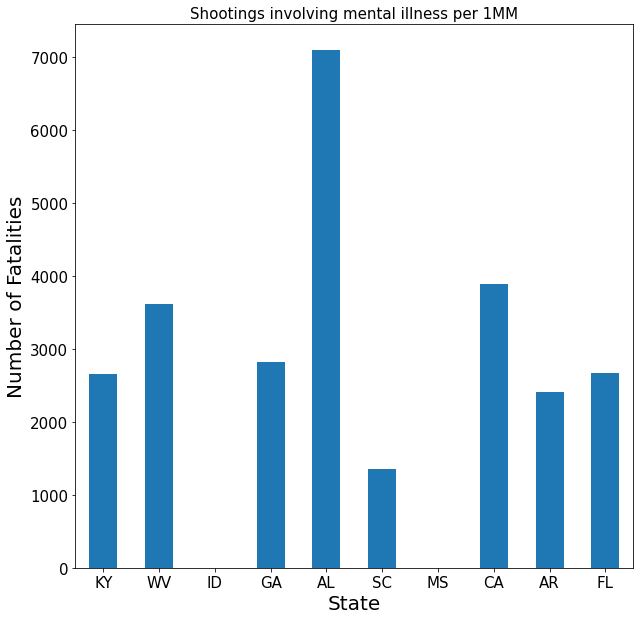

In [59]:
top_shootings.plot(kind = 'bar',
                   x = 'state',
                   y = 'illness_shoot_1MM',
                   xlabel = 'State',
                   ylabel = 'Number of Fatalities',
                   title =  'Shootings involving mental illness per 1MM',
                   legend = False,
                   figsize = (10,10),
                   rot = 0)

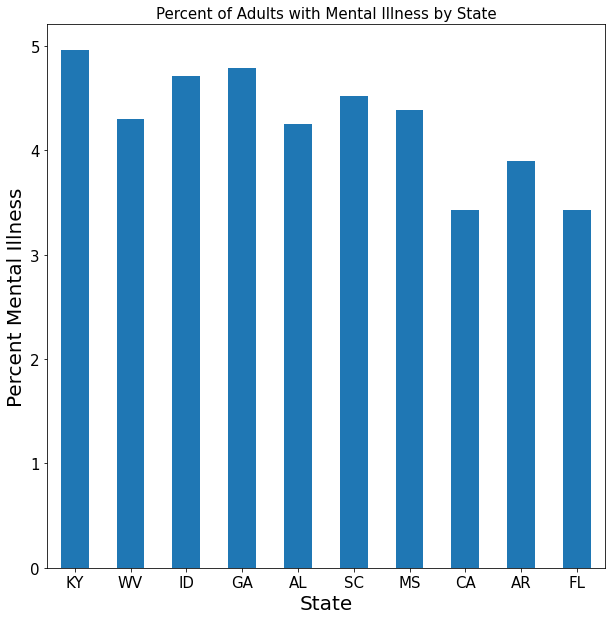

In [60]:
top_shootings.plot(kind = 'bar',
                   x = 'state',
                   y = 'percent_illness_state',
                   xlabel = 'State',
                   ylabel = 'Percent Mental Illness',
                   title =  'Percent of Adults with Mental Illness by State',
                   legend = False,
                   figsize = (10,10),
                   rot = 0)

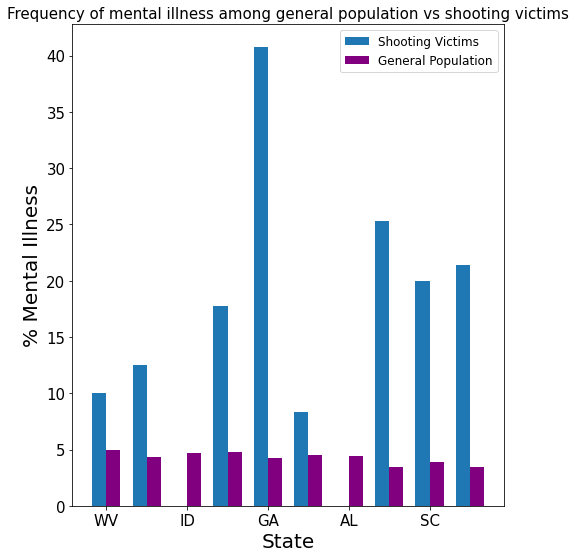

In [83]:
#make a grouped bar chart showing rate of mental illness in gen pop vs in shooting df
labels = top_shootings['state']
labels = labels.values
shot = top_shootings['per_mental_illness']
gen_pop = top_shootings['percent_illness_state']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, shot, width, label='Shooting Victims')
rects2 = ax.bar(x + width/2, gen_pop, width, label='General Population', color = 'purple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Mental Illness')
ax.set_xlabel('State')
ax.set_title('Frequency of mental illness among general population vs shooting victims')
# ax.set_xticks(x, labels)
ax.set_xticklabels(labels)

ax.legend(prop={'size': 12})

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()
fig.set_size_inches(15,10)

plt.show()


In [74]:
print(x)
print(labels)

[0 1 2 3 4 5 6 7 8 9]
16    KY
46    WV
12    ID
10    GA
1     AL
37    SC
24    MS
4     CA
2     AR
9     FL
Name: state, dtype: object


#Spaghetti at the Wall: just seeing what works

##Mental Illness

In [62]:
mental_ill = full_df.groupby('signs_of_mental_illness').agg({'id':'count'})
mental_ill  = mental_ill.reset_index()
mental_ill['percent_ill'] = mental_ill['id']/full_df.shape[0]

mental_ill.head()

,signs_of_mental_illness,id,percent_ill
0,False,1282,0.73299
1,True,467,0.26701


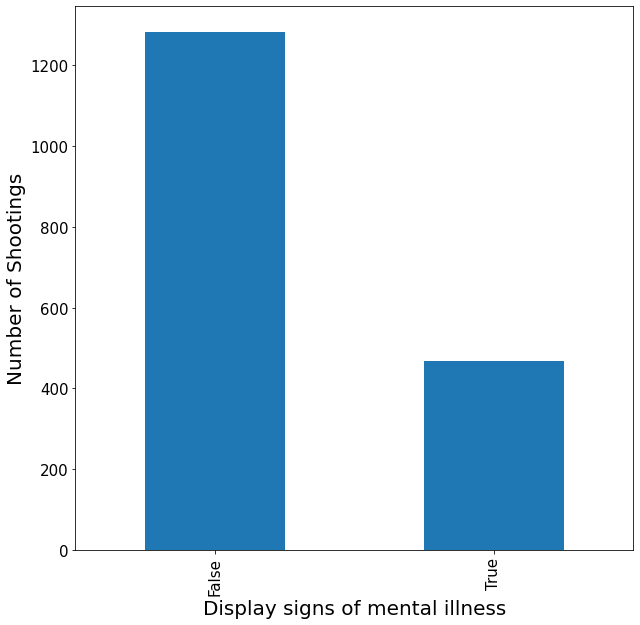

In [63]:
mental_ill.plot(kind = 'bar',
                x = 'signs_of_mental_illness',
                y = 'id', 
                xlabel = 'Display signs of mental illness',
                ylabel = 'Number of Shootings',
                legend = False, 
                figsize = (10,10))




##Body Camera

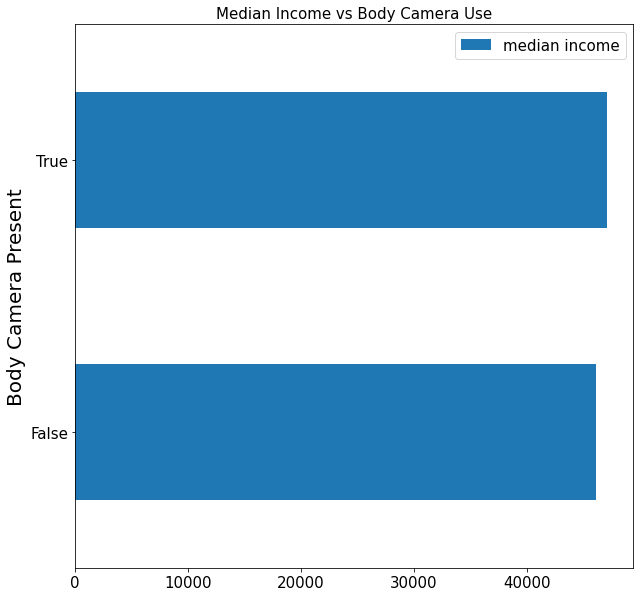

In [64]:
full_df.groupby('body_camera').agg({'median income':np.median}).plot(kind = 'barh',
                                                                   xlabel = 'Body Camera Present',
                                                                   ylabel = 'Median Income',
                                                                   title = 'Median Income vs Body Camera Use',
                                                                   figsize=(10,10))

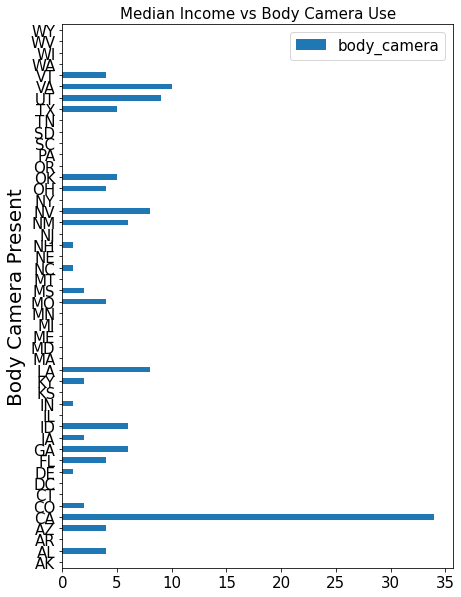

In [65]:
from pandas._libs.hashtable import value_count
full_df.groupby('state').agg({'body_camera':np.sum}).plot(kind = 'barh',
                                                                   xlabel = 'Body Camera Present',
                                                                   ylabel = 'Median Income',
                                                                   title = 'Median Income vs Body Camera Use',
                                                                   figsize=(7,10))

In [66]:
#make bar look at body cam use
# state_df[['freq_cam_use', 'state']].plot(kind='barh', 
#                                   x='state',
#                                   y= 'freq_cam_use',
#                                   title='State vs. Frequency of Body Camera Use',
#                                   figsize=(10,10))

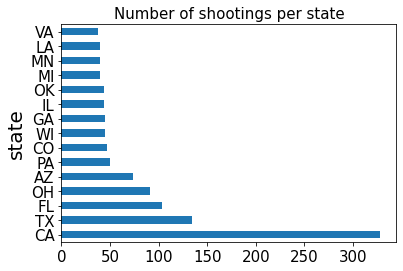

In [67]:
full_df['state'].value_counts()[0:15].plot(kind='barh',
                                           ylabel = 'number of shootings',
                                           xlabel = 'state',
                                           title = 'Number of shootings per state')
#NOT ADJUSTED FOR POPULATION

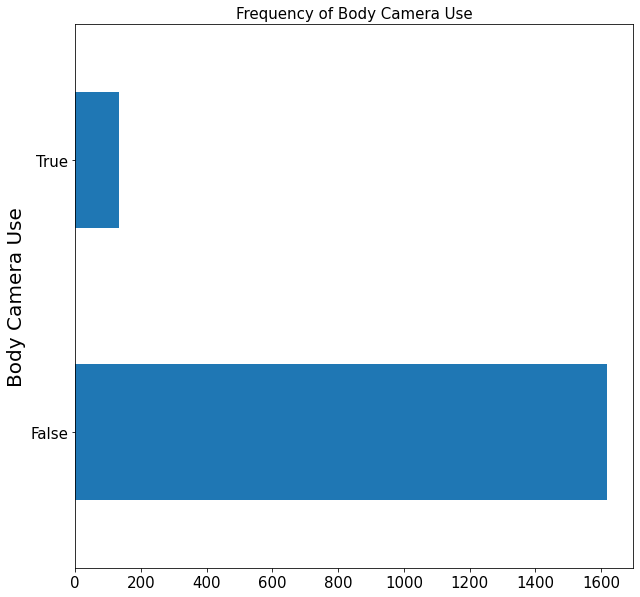

In [68]:
full_df['body_camera'].value_counts().plot(kind='barh',
                                           ylabel = 'number of shootings',
                                           xlabel = 'Body Camera Use',
                                           title = 'Frequency of Body Camera Use',
                                           figsize = (10,10))

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


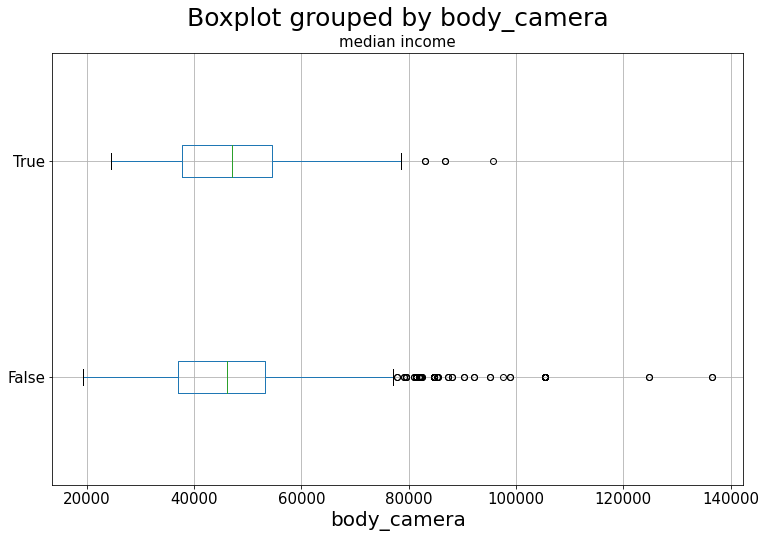

In [69]:
full_df.boxplot('median income', by='body_camera', figsize=(12, 8), vert=False)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


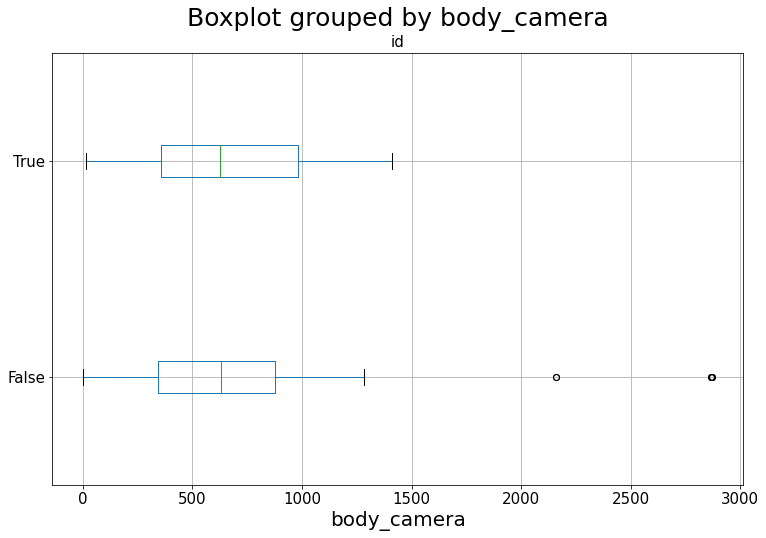

In [70]:
ax = full_df.boxplot('id', by='body_camera', figsize=(12, 8), vert=False)

##State Plots

Top Fatalities

In [71]:
top_state = state_df.sort_values("percent_fatalities", ascending=False)[:10]
top_state.plot(kind = 'bar',
              x = 'state',
              y = 'percent_fatalities',
              figsize=(10,10),
              xlabel = 'state',
              title = 'Percent Fatalities by State',
              legend = False)

KeyError: ignored

Top Body Camera Use

In [ ]:
top_cam = state_df.sort_values("freq_cam", ascending=False)[:10]

In [ ]:
top_cam.plot(kind = 'barh',
              x = 'state',
              y = 'freq_cam',
              figsize=(10,10),
              xlabel = 'state',
              title = 'Frequency of Body Camera Use by State',
              legend = False)

Top Median Income

In [ ]:
top_income = state_df.sort_values("median income", ascending=False)[:10]

In [ ]:
top_income.plot(kind = 'barh',
              x = 'state',
              y = 'median income',
              figsize=(10,10),
              xlabel = 'state',
              title = 'Median Income by State',
              legend = False)

In [ ]:
state_df.plot(kind = 'scatter',
              x = 'median income',
              y = 'freq_cam',
              xlabel = 'Median Income',
              ylabel = 'Frequency of Body Cam Use',
              title = 'Frequency of body cam use by median income',
              figsize = (10,10))

In [ ]:
state_df.plot(kind = 'scatter',
              x = '2015 population',
              y = 'freq_cam',
              xlabel = 'population',
              ylabel = 'Frequency of Body Cam Use',
              title = 'Frequency of body cam use by population',
              figsize = (10,10))

In [ ]:
state_df.plot(kind = 'scatter',
              x = 'percent_fatalities',
              y = 'per_mental_illness',
              xlabel = 'percent fatalities',
              ylabel = 'occurence of reported mental illness',
              title = 'Frequency of body cam use by median income',
              figsize = (10,10))

##City Plots

In [ ]:
top_ill_city = city_df.sort_values("per_mental_illness", ascending=False)[:10]
top_ill_city.plot(kind = 'barh',
              x = 'city',
              y = 'per_mental_illness',
              figsize=(10,10),
              xlabel = 'state',
              ylabel = '% of shootings with signs of mental illness',
              title = 'Frequency of Mental Illness in Shootings per city',
              legend = False)

In [ ]:
topcity_cam = city_df.sort_values("freq_cam", ascending=False)[:10]
topcity_cam.plot(kind = 'barh',
              x = 'city',
              y = 'freq_cam',
              figsize=(10,10),
              xlabel = 'city',
              title = 'Frequency of Body Camera Use by City',
              legend = False)

In [ ]:
top_income = state_df.sort_values("median income", ascending=False)[:10]
city_df.plot(kind = 'scatter',
              x = 'median income',
              y = 'freq_cam',
              xlabel = 'Median Income',
              ylabel = 'Frequency of Body Cam Use',
              title = 'Frequency of body cam use by median income',
              figsize = (10,10))

In [ ]:
ill_num_shootings = city_df.sort_values("id", ascending=False)[:10]
city_df.plot(kind = 'scatter',
              x = 'per_mental_illness',
              y = 'id',
              xlabel = 'percent of shootings involving mental illness',
              ylabel = 'Number of Shootings',
              title = 'Number of shootings involving mental illness',
              figsize = (10,10))